In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import networkx as nx

In [2]:
news_df = pd.read_csv("data/Jason_articles_with_classifications.csv") # Read news data into DataFrame
news_df

,summary,date,location_article,lat,lng,topics_auto,topics_stat,topics_10,topics_7
0,The article discusses the passing of the new C...,2011_07,Juba,4.859363,31.571250,-1,-1,-1,-1
1,The article discusses the military actions tak...,2011_07,Abyei,9.838551,28.486396,-1,-1,-1,-1
2,The article discusses the signing of a Framewo...,2011_06,Southern Kordofan,11.036544,30.895824,0,0,0,0
3,The article discusses the upcoming independenc...,2011_07,South Sudan,6.876992,31.306979,0,0,0,0
4,The article discusses the need for South Sudan...,2011_07,Juba,4.859363,31.571250,5,1,2,2
...,...,...,...,...,...,...,...,...,...
18515,The article discusses the successful delivery ...,2023_04,Maiwut Primary Health Care Centre,8.606200,33.924100,3,5,1,1
18516,The article discusses the bombing and forced e...,2023_04,Khartoum,15.500654,32.559899,-1,-1,-1,-1
18517,The article discusses how Prime Minister Abiy ...,2023_04,Addis Ababa,8.980603,38.757761,-1,-1,-1,-1
18518,The article discusses the collapse of a commer...,2023_04,Kampala International University,0.294360,32.603970,-1,-1,-1,-1


In [4]:
news_df['topics_stat'].unique()

array([-1,  0,  1,  4,  2,  5,  8,  9,  7,  6,  3], dtype=int64)

In [4]:
df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
df_ipc = df[["ipc","year_month", "district"]] # Extract useful column
df_ipc = df_ipc.dropna(subset=['ipc'])
df_ipc.rename(columns={'year_month':'date', 'district':'location_article'},inplace=True) # Rename columns in order to merge with news df
df_ipc.sort_values(by=['location_article', 'date'], inplace=True) # Sort the DataFrame by 'location_article' and 'date'
df_ipc['1_month_lag'] = df_ipc.groupby('location_article')['ipc'].shift(-1) # Group the DataFrame by 'location_article' and apply a one-month lag to 'ipc' within each group
df_ipc['3_month_lag'] = df_ipc.groupby('location_article')['ipc'].shift(-3) # Group the DataFrame by 'location_article' and apply a one-month lag to 'ipc' within each group
df['district']

0            Bor
1            Bor
2            Bor
3            Bor
4            Bor
          ...   
12319    Malakal
12320    Malakal
12321    Malakal
12322    Malakal
12323    Malakal
Name: district, Length: 12324, dtype: object

In [4]:
df_merge = news_df.merge(df_ipc, on=['location_article','date'])
df_merge

,summary,date,location_article,lat,lng,topics_auto,topics_stat,topics_10,topics_7,ipc,1_month_lag,3_month_lag
0,The article discusses the passing of the new C...,2011_07,Juba,4.859363,31.571250,-1,-1,-1,-1,2.0,1.0,1.0
1,The article discusses the need for South Sudan...,2011_07,Juba,4.859363,31.571250,5,1,2,2,2.0,1.0,1.0
2,The article discusses the Elders' letter of co...,2011_07,Juba,4.859363,31.571250,-1,-1,-1,-1,2.0,1.0,1.0
3,The article discusses a mock parade conducted ...,2011_07,Juba,4.859363,31.571250,0,0,0,0,2.0,1.0,1.0
4,The article discusses the South Sudan governme...,2011_07,Juba,4.859363,31.571250,-1,-1,-1,-1,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6948,The article discusses a sports event held in J...,2020_02,Juba,4.859363,31.571250,8,6,4,3,3.0,NaN,NaN
6949,The article discusses the release of South Sud...,2020_02,Juba,4.859363,31.571250,-1,-1,-1,-1,3.0,NaN,NaN
6950,The article discusses a report by UN investiga...,2020_02,Wau,40.784488,-73.977729,-1,-1,-1,-1,3.0,NaN,NaN
6951,The article discusses the issue of women and g...,2020_02,Yambio,4.577569,28.398784,9,7,3,0,3.0,NaN,NaN


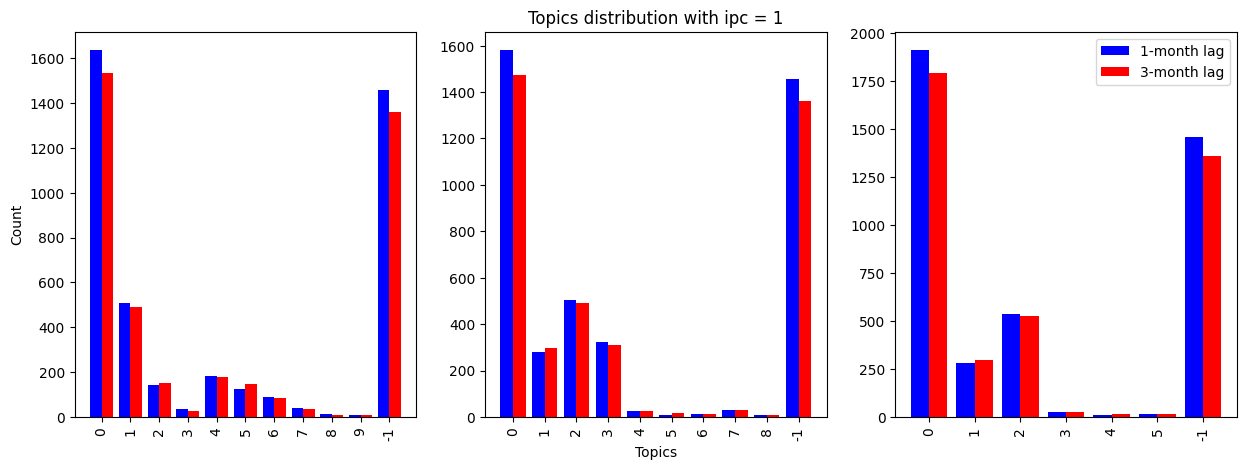

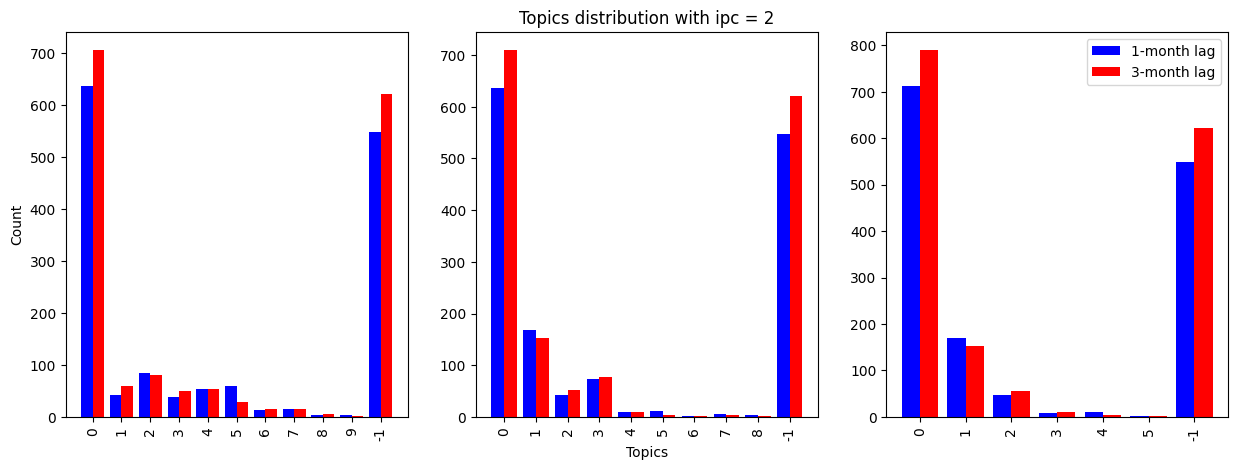

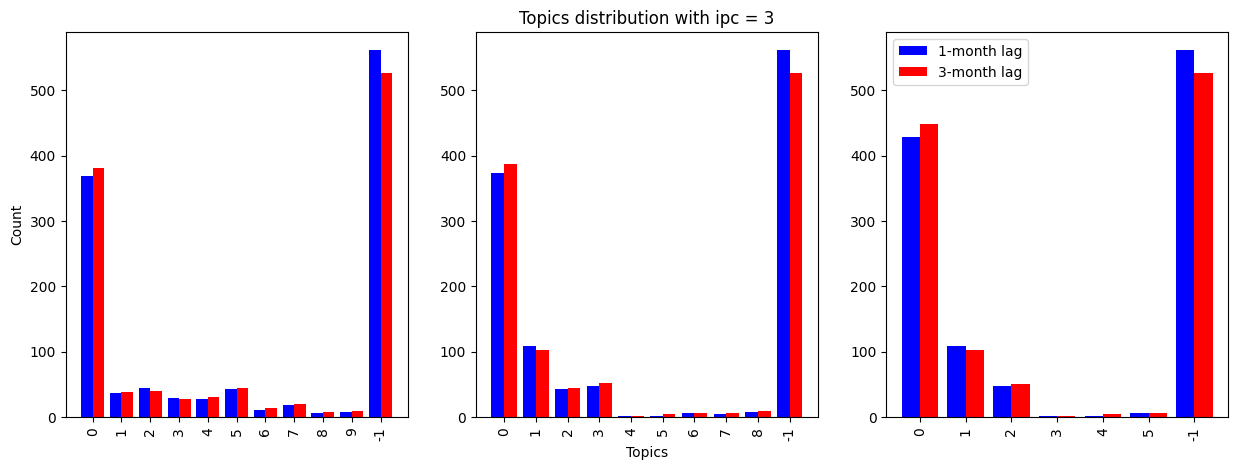

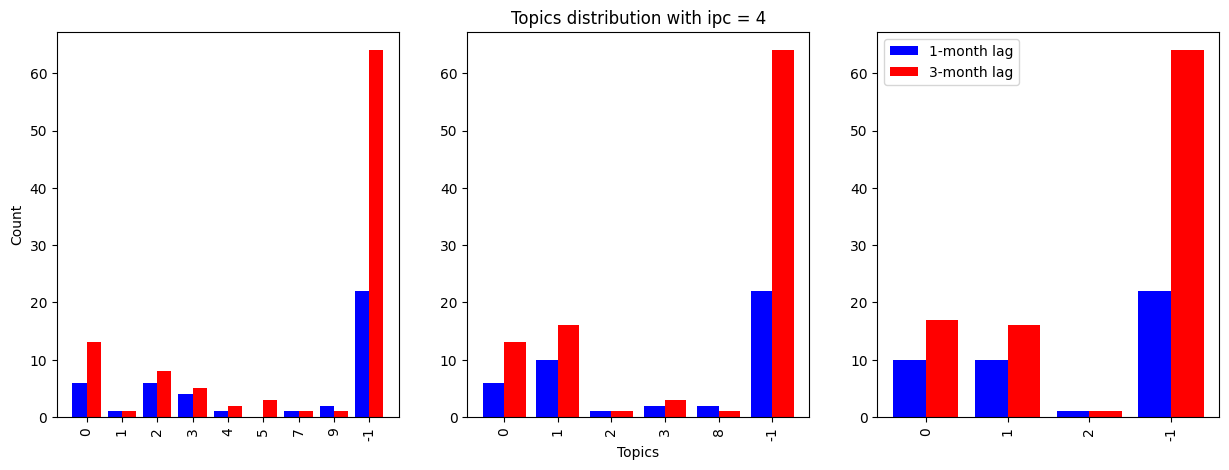

In [16]:
# Define the width of the bars
bar_width = 0.4

for ipc in range(1, 5):
    # Count the occurrences of each unique topic
    topic_stat_1_lag = df_merge[df_merge['1_month_lag'] == ipc]['topics_stat'].value_counts().sort_index()
    topic_stat_3_lag = df_merge[df_merge['3_month_lag'] == ipc]['topics_stat'].value_counts().sort_index()

    topic_10_1_lag = df_merge[df_merge['1_month_lag'] == ipc]['topics_10'].value_counts().sort_index()
    topic_10_3_lag = df_merge[df_merge['3_month_lag'] == ipc]['topics_10'].value_counts().sort_index()

    topic_7_1_lag = df_merge[df_merge['1_month_lag'] == ipc]['topics_7'].value_counts().sort_index()
    topic_7_3_lag = df_merge[df_merge['3_month_lag'] == ipc]['topics_7'].value_counts().sort_index()


    # Combine unique topics from both dataframes
    stat_all_topics = set(topic_stat_1_lag.index) | set(topic_stat_3_lag.index)
    ten_all_topics = set(topic_10_1_lag.index) | set(topic_10_3_lag.index)
    seven_all_topics = set(topic_7_1_lag.index) | set(topic_7_3_lag.index)

    # Create an array of x positions for the bars
    x_stat = np.arange(len(stat_all_topics))
    x_10 = np.arange(len(ten_all_topics))
    x_7 = np.arange(len(seven_all_topics))

    # Create arrays for the counts for both 1-month and 3-month lag
    stat_1_lag = [topic_stat_1_lag.get(topic, 0) for topic in stat_all_topics]
    stat_3_lag = [topic_stat_3_lag.get(topic, 0) for topic in stat_all_topics]

    ten_1_lag = [topic_10_1_lag.get(topic, 0) for topic in ten_all_topics]
    ten_3_lag = [topic_10_3_lag.get(topic, 0) for topic in ten_all_topics]

    seven_1_lag = [topic_7_1_lag.get(topic, 0) for topic in seven_all_topics]
    seven_3_lag = [topic_7_3_lag.get(topic, 0) for topic in seven_all_topics]

    # Create subplots with 1 row and 3 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Create a bar chart for 1-month lag with blue color on the first subplot (ax1)
    ax1.bar(x_stat - bar_width / 2, stat_1_lag, bar_width, label='1-month lag', color='blue')
    # Create a bar chart for 3-month lag with red color on the second subplot (ax1)
    ax1.bar(x_stat + bar_width / 2, stat_3_lag, bar_width, label='3-month lag', color='red')
    ax1.set_ylabel('Count')
    ax1.set_xticks(x_stat)
    ax1.set_xticklabels(stat_all_topics, rotation=90)

    # Create a bar chart for 1-month lag with blue color on the first subplot (ax2)
    ax2.bar(x_10 - bar_width / 2, ten_1_lag, bar_width, label='1-month lag', color='blue')
    # Create a bar chart for 3-month lag with red color on the second subplot (ax2)
    ax2.bar(x_10 + bar_width / 2, ten_3_lag, bar_width, label='3-month lag', color='red')
    ax2.set_title(f'Topics distribution with ipc = {ipc}')
    ax2.set_xlabel('Topics')
    ax2.set_xticks(x_10)
    ax2.set_xticklabels(ten_all_topics, rotation=90)

    # Create a bar chart for 1-month lag with blue color on the first subplot (ax3)
    ax3.bar(x_7 - bar_width / 2, seven_1_lag, bar_width, label='1-month lag', color='blue')
    # Create a bar chart for 3-month lag with red color on the second subplot (ax3)
    ax3.bar(x_7 + bar_width / 2, seven_3_lag, bar_width, label='3-month lag', color='red')
    ax3.set_xticks(x_7)
    ax3.set_xticklabels(seven_all_topics, rotation=90)
    ax3.legend()

    plt.show()


In [17]:
# Group the DataFrame by 'topics' and aggregate the 'ipc' into lists
stat_1_lag_group = df_merge.groupby('topics_stat')['1_month_lag'].agg(list).reset_index()
stat_1_lag_group['1_month_lag'] = stat_1_lag_group['1_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
stat_3_lag_group = df_merge.groupby('topics_stat')['3_month_lag'].agg(list).reset_index()
stat_3_lag_group['3_month_lag'] = stat_3_lag_group['3_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])

ten_1_lag_group = df_merge.groupby('topics_10')['1_month_lag'].agg(list).reset_index()
ten_1_lag_group['1_month_lag'] = ten_1_lag_group['1_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
ten_3_lag_group = df_merge.groupby('topics_10')['3_month_lag'].agg(list).reset_index()
ten_3_lag_group['3_month_lag'] = ten_3_lag_group['3_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])

seven_1_lag_group = df_merge.groupby('topics_7')['1_month_lag'].agg(list).reset_index()
seven_1_lag_group['1_month_lag'] = seven_1_lag_group['1_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
seven_3_lag_group = df_merge.groupby('topics_7')['3_month_lag'].agg(list).reset_index()
seven_3_lag_group['3_month_lag'] = seven_3_lag_group['3_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
stat_1_lag_group


,topics_stat,1_month_lag
0,-1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,2,"[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
9,8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, ..."


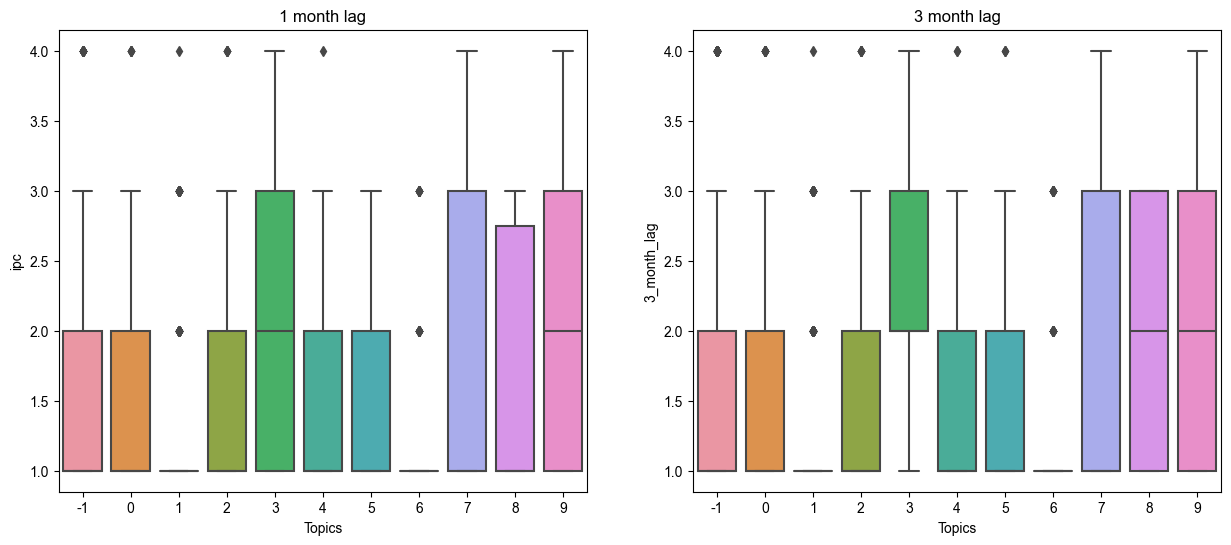

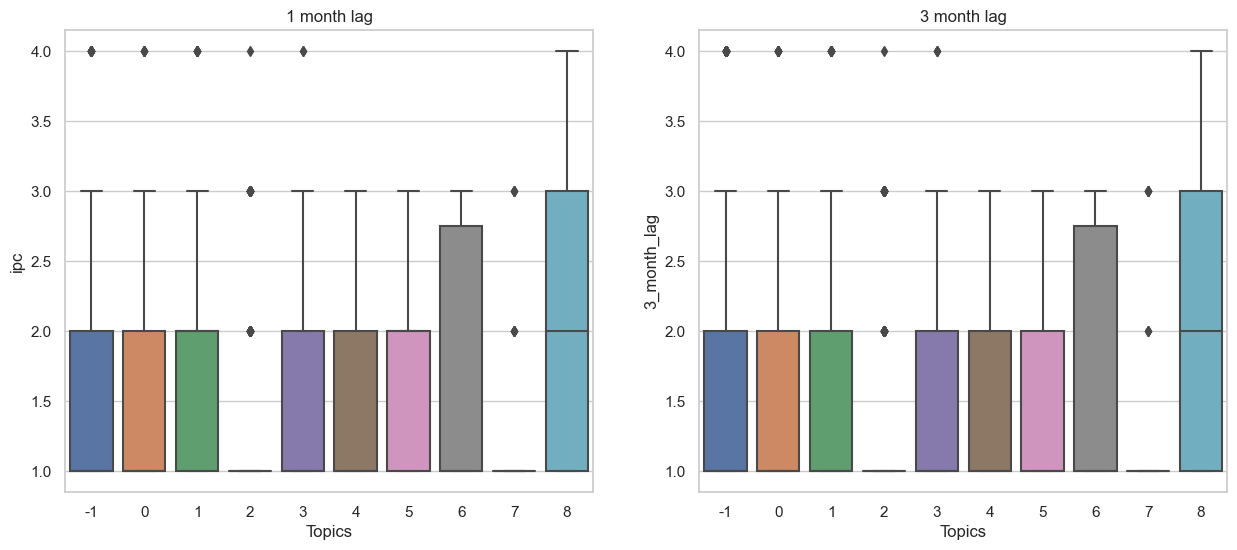

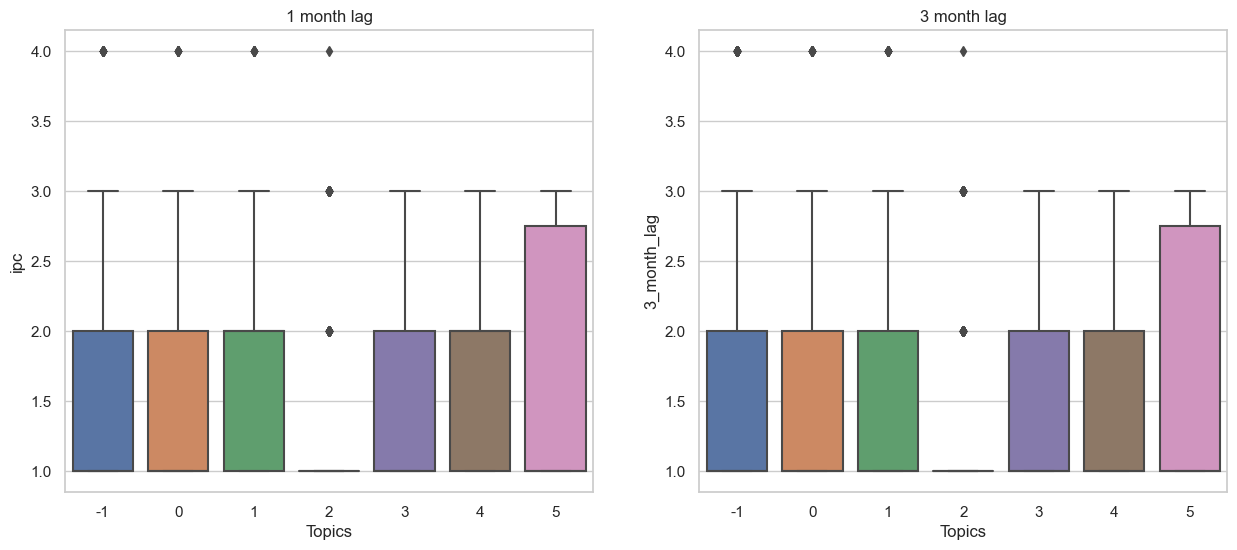

In [18]:
for one_lag, three_lag in [(stat_1_lag_group,stat_3_lag_group), (ten_1_lag_group,ten_3_lag_group), (seven_1_lag_group,seven_3_lag_group)]:
    # Explode the lists in 'lag' column
    exploded_1_lag = one_lag.explode('1_month_lag')
    exploded_3_lag = three_lag.explode('3_month_lag')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    # Set the style and create a box plot
    sns.set(style="whitegrid")
    sns.boxplot(data=exploded_1_lag, x=exploded_1_lag.columns[0], y=exploded_1_lag.columns[1], ax=ax1)
    sns.boxplot(data=exploded_3_lag, x=exploded_3_lag.columns[0], y=exploded_3_lag.columns[1], ax=ax2)

    # Add labels and title
    ax1.set_xlabel('Topics')
    ax1.set_ylabel('ipc')
    ax1.set_title('1 month lag')

    ax2.set_xlabel('Topics')
    ax2.set_title('3 month lag')

    plt.show()

In [19]:
# Perform one-way ANOVA
f_statistic_auto, p_value_auto = stats.f_oneway(stat_1_lag_group['1_month_lag'][0],stat_1_lag_group['1_month_lag'][1],stat_1_lag_group['1_month_lag'][2],stat_1_lag_group['1_month_lag'][3],stat_1_lag_group['1_month_lag'][4],stat_1_lag_group['1_month_lag'][5],stat_1_lag_group['1_month_lag'][6],stat_1_lag_group['1_month_lag'][7],stat_1_lag_group['1_month_lag'][8],stat_1_lag_group['1_month_lag'][9])
f_statistic_10, p_value_10 = stats.f_oneway(ten_1_lag_group['1_month_lag'][0],ten_1_lag_group['1_month_lag'][1],ten_1_lag_group['1_month_lag'][2],ten_1_lag_group['1_month_lag'][3],ten_1_lag_group['1_month_lag'][4],ten_1_lag_group['1_month_lag'][5],ten_1_lag_group['1_month_lag'][6],ten_1_lag_group['1_month_lag'][7],ten_1_lag_group['1_month_lag'][8],ten_1_lag_group['1_month_lag'][9])

print(f"One-way ANOVA F-stat auto: {f_statistic_auto}")
print(f"P-value auto: {p_value_auto}")
print(f"One-way ANOVA F-stat 10: {f_statistic_10}")
print(f"P-value 10: {p_value_10}")

One-way ANOVA F-stat auto: 28.413809676873925
P-value auto: 5.50258307412669e-49
One-way ANOVA F-stat 10: 26.594041765239897
P-value 10: 1.1884633958289698e-45


In [20]:
# Flatten the data and assign group labels
flattened_data = [val for sublist in stat_1_lag_group['1_month_lag'] for val in sublist]
group_labels = [label for label, data_list in zip(stat_1_lag_group['topics_stat'], stat_1_lag_group['1_month_lag']) for _ in data_list]

# Perform Tukey's HSD post hoc test
posthoc = pairwise_tukeyhsd(flattened_data, group_labels)

# View the results
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -1      0  -0.1453    0.0 -0.2139 -0.0768   True
    -1      1   -0.469    0.0 -0.5822 -0.3558   True
    -1      2   0.0124    1.0 -0.1441   0.169  False
    -1      3    0.329 0.0007  0.0864  0.5715   True
    -1      4   -0.243 0.0001 -0.4033 -0.0828   True
    -1      5  -0.0266    1.0  -0.199  0.1458  False
    -1      6  -0.3525 0.0001 -0.5908 -0.1141   True
    -1      7   0.0687 0.9996 -0.2257   0.363  False
    -1      8   0.0562    1.0 -0.4748  0.5873  False
    -1      9   0.5194  0.076  -0.024  1.0629  False
     0      1  -0.3237    0.0 -0.4367 -0.2107   True
     0      2   0.1578 0.0458  0.0014  0.3141   True
     0      3   0.4743    0.0  0.2319  0.7167   True
     0      4  -0.0977  0.674 -0.2578  0.0624  False
     0      5   0.1187 0.4906 -0.0535   0.291  False
     0      6  -0.2071 0.1585 -0.4454  0.0311 

In [21]:
# Convert the TukeyHSDResults to a DataFrame
df_posthoc = pd.DataFrame(data=posthoc._results_table.data[1:], columns=posthoc._results_table.data[0])

# Filter rows where 'reject' is False
significant_comparisons = df_posthoc[df_posthoc['reject']==False]

significant_comparisons_sorted = significant_comparisons.sort_values(by='p-adj', ascending=False)

# Display the significant comparisons
print(significant_comparisons_sorted)

    group1  group2  meandiff   p-adj   lower   upper  reject
2       -1       2    0.0124  1.0000 -0.1441  0.1690   False
29       2       5   -0.0390  1.0000 -0.2614  0.1834   False
8       -1       8    0.0562  1.0000 -0.4748  0.5873   False
52       7       8   -0.0125  1.0000 -0.6157  0.5908   False
5       -1       5   -0.0266  1.0000 -0.1990  0.1458   False
47       5       8    0.0828  1.0000 -0.4712  0.6369   False
32       2       8    0.0438  1.0000 -0.5055  0.5932   False
31       2       7    0.0563  1.0000 -0.2699  0.3825   False
7       -1       7    0.0687  0.9996 -0.2257  0.3630   False
46       5       7    0.0953  0.9979 -0.2388  0.4294   False
39       3       9    0.1905  0.9944 -0.4006  0.7816   False
17       0       8    0.2016  0.9801 -0.3294  0.7326   False
41       4       6   -0.1094  0.9747 -0.3883  0.1694   False
23       1       6    0.1165  0.9288 -0.1382  0.3713   False
38       3       8   -0.2727  0.9153 -0.8525  0.3070   False
43       4       8    0.

In [23]:
significant_comparisons_sorted_filter = significant_comparisons_sorted[(significant_comparisons_sorted['p-adj']>0.95) & (abs(significant_comparisons_sorted['meandiff']) < 0.1) ]
significant_comparisons_sorted_filter.reset_index()

,index,group1,group2,meandiff,p-adj,lower,upper,reject
0,2,-1,2,0.0124,1.0000,-0.1441,0.1690,False
1,29,2,5,-0.0390,1.0000,-0.2614,0.1834,False
2,8,-1,8,0.0562,1.0000,-0.4748,0.5873,False
3,52,7,8,-0.0125,1.0000,-0.6157,0.5908,False
4,5,-1,5,-0.0266,1.0000,-0.1990,0.1458,False
5,47,5,8,0.0828,1.0000,-0.4712,0.6369,False
6,32,2,8,0.0438,1.0000,-0.5055,0.5932,False
7,31,2,7,0.0563,1.0000,-0.2699,0.3825,False
8,7,-1,7,0.0687,0.9996,-0.2257,0.3630,False
9,46,5,7,0.0953,0.9979,-0.2388,0.4294,False


C:\Users\20210967\AppData\Local\Temp\ipykernel_17044\1592653063.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


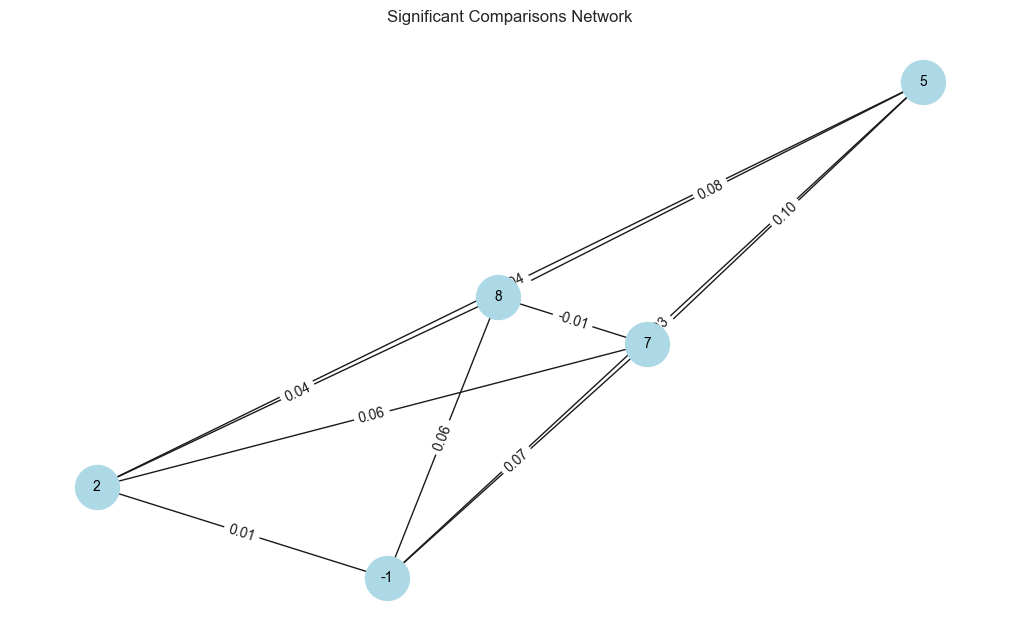

In [24]:
# Create a network graph
G = nx.Graph()

# Add nodes (groups) to the graph
for group in significant_comparisons_sorted_filter['group1']:
    G.add_node(group)

# Add edges (significant comparisons) to the graph
for index, row in significant_comparisons_sorted_filter.iterrows():
    G.add_edge(row['group1'], row['group2'], weight=row['meandiff'])

# Set positions for the nodes (you can customize this)
pos = nx.spring_layout(G)

# Create a network plot
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')

# Add edge labels (mean differences)
edge_labels = {(edge[0], edge[1]): f"{weight:.2f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Customize the plot
plt.title('Significant Comparisons Network')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
# Find the mode of 'topics' by grouping 'date' and 'location_article'
df_max_topic = news_df.groupby(['date','location_article'])[['topics_auto','topics_10','topics_7', 'topics_stat']].agg(lambda x: x.mode().iloc[0]).reset_index()
df_max_topic = df_max_topic.merge(df_ipc, on=['location_article','date'])
df_max_topic

,date,location_article,topics_auto,topics_10,topics_7,topics_stat,ipc,1_month_lag,3_month_lag
0,2011_06,Juba,-1,-1,-1,-1,2.0,2.0,1.0
1,2011_07,Bor,0,0,0,0,2.0,1.0,1.0
2,2011_07,Juba,0,0,0,0,2.0,1.0,1.0
3,2011_07,Malakal,3,1,1,1,2.0,1.0,1.0
4,2011_07,Torit,0,0,0,0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
436,2019_12,Juba,0,0,0,0,3.0,3.0,NaN
437,2020_01,Juba,-1,-1,-1,-1,3.0,3.0,NaN
438,2020_02,Juba,-1,-1,-1,-1,3.0,NaN,NaN
439,2020_02,Wau,-1,-1,-1,-1,3.0,NaN,NaN


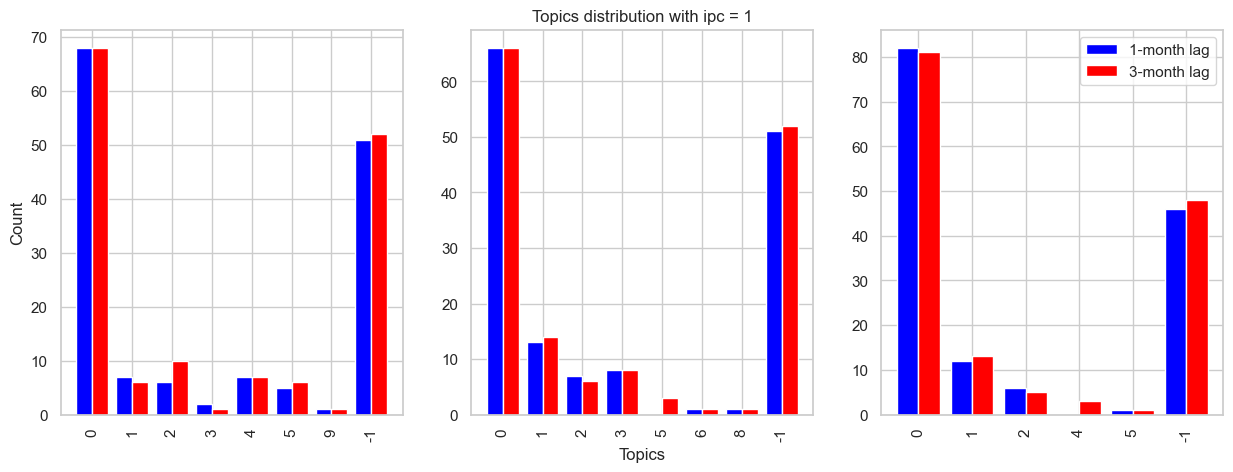

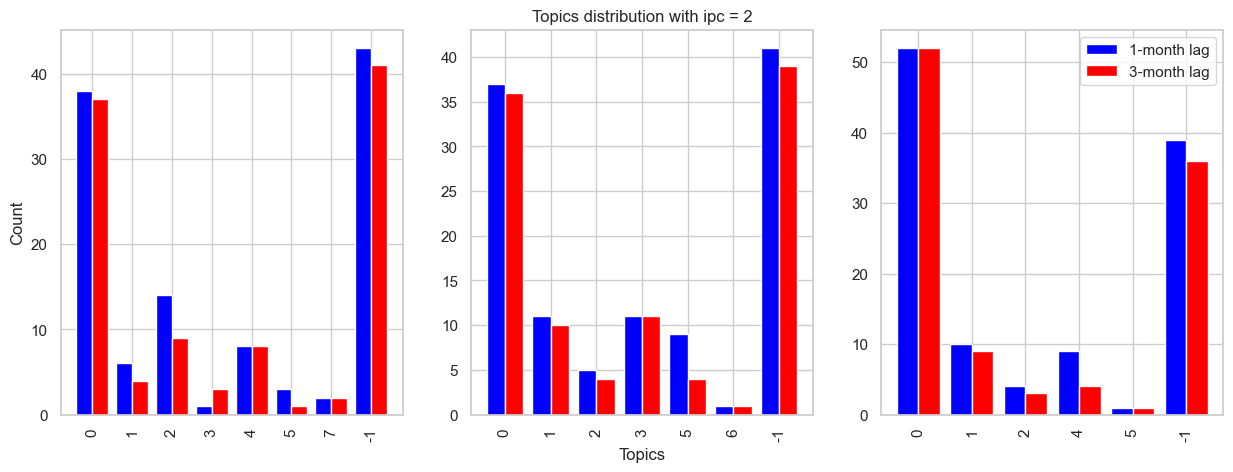

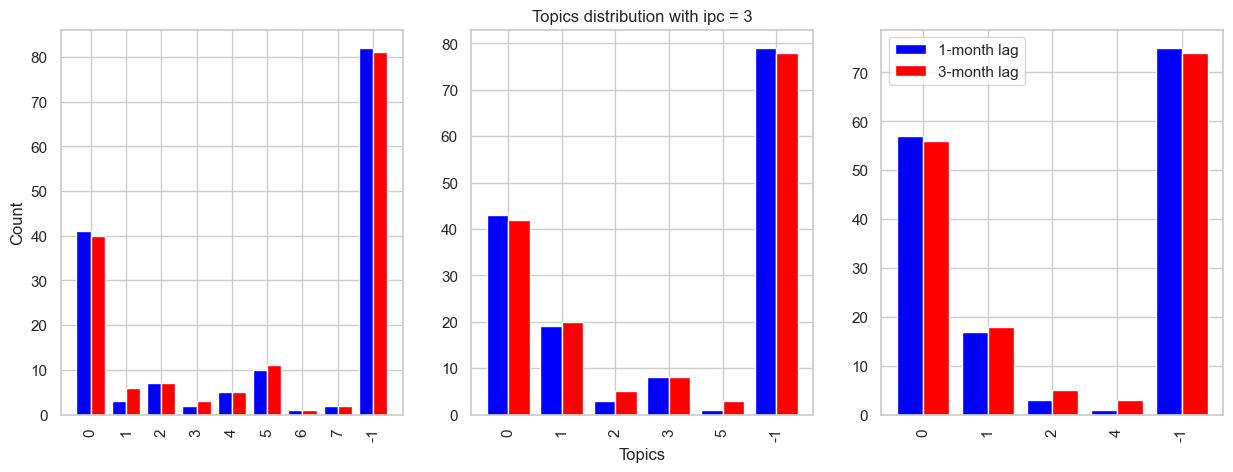

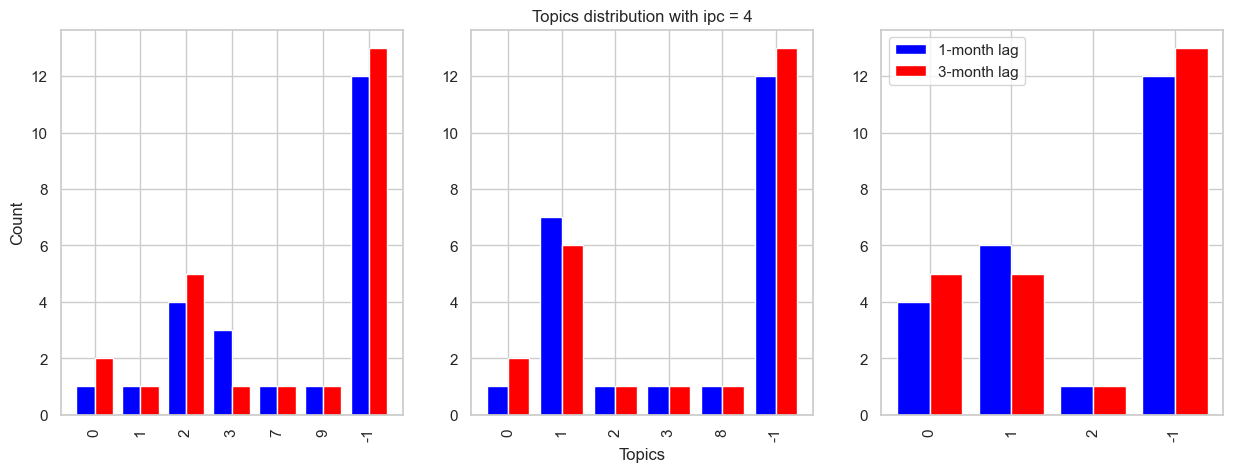

In [27]:
# Define the width of the bars
bar_width = 0.4

for ipc in range(1, 5):
    # Count the occurrences of each unique topic
    topic_stat_1_lag = df_max_topic[df_max_topic['1_month_lag'] == ipc]['topics_stat'].value_counts().sort_index()
    topic_stat_3_lag = df_max_topic[df_max_topic['3_month_lag'] == ipc]['topics_stat'].value_counts().sort_index()

    topic_10_1_lag = df_max_topic[df_max_topic['1_month_lag'] == ipc]['topics_10'].value_counts().sort_index()
    topic_10_3_lag = df_max_topic[df_max_topic['3_month_lag'] == ipc]['topics_10'].value_counts().sort_index()

    topic_7_1_lag = df_max_topic[df_max_topic['1_month_lag'] == ipc]['topics_7'].value_counts().sort_index()
    topic_7_3_lag = df_max_topic[df_max_topic['3_month_lag'] == ipc]['topics_7'].value_counts().sort_index()


    # Combine unique topics from both dataframes
    stat_all_topics = set(topic_stat_1_lag.index) | set(topic_stat_3_lag.index)
    ten_all_topics = set(topic_10_1_lag.index) | set(topic_10_3_lag.index)
    seven_all_topics = set(topic_7_1_lag.index) | set(topic_7_3_lag.index)

    # Create an array of x positions for the bars
    x_stat = np.arange(len(stat_all_topics))
    x_10 = np.arange(len(ten_all_topics))
    x_7 = np.arange(len(seven_all_topics))

    # Create arrays for the counts for both 1-month and 3-month lag
    auto_1_lag = [topic_stat_1_lag.get(topic, 0) for topic in stat_all_topics]
    auto_3_lag = [topic_stat_3_lag.get(topic, 0) for topic in stat_all_topics]

    ten_1_lag = [topic_10_1_lag.get(topic, 0) for topic in ten_all_topics]
    ten_3_lag = [topic_10_3_lag.get(topic, 0) for topic in ten_all_topics]

    seven_1_lag = [topic_7_1_lag.get(topic, 0) for topic in seven_all_topics]
    seven_3_lag = [topic_7_3_lag.get(topic, 0) for topic in seven_all_topics]

    # Create subplots with 1 row and 3 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Create a bar chart for 1-month lag with blue color on the first subplot (ax1)
    ax1.bar(x_stat - bar_width / 2, auto_1_lag, bar_width, label='1-month lag', color='blue')
    # Create a bar chart for 3-month lag with red color on the second subplot (ax1)
    ax1.bar(x_stat + bar_width / 2, auto_3_lag, bar_width, label='3-month lag', color='red')
    ax1.set_ylabel('Count')
    ax1.set_xticks(x_stat)
    ax1.set_xticklabels(stat_all_topics, rotation=90)

    # Create a bar chart for 1-month lag with blue color on the first subplot (ax2)
    ax2.bar(x_10 - bar_width / 2, ten_1_lag, bar_width, label='1-month lag', color='blue')
    # Create a bar chart for 3-month lag with red color on the second subplot (ax2)
    ax2.bar(x_10 + bar_width / 2, ten_3_lag, bar_width, label='3-month lag', color='red')
    ax2.set_title(f'Topics distribution with ipc = {ipc}')
    ax2.set_xlabel('Topics')
    ax2.set_xticks(x_10)
    ax2.set_xticklabels(ten_all_topics, rotation=90)

    # Create a bar chart for 1-month lag with blue color on the first subplot (ax3)
    ax3.bar(x_7 - bar_width / 2, seven_1_lag, bar_width, label='1-month lag', color='blue')
    # Create a bar chart for 3-month lag with red color on the second subplot (ax3)
    ax3.bar(x_7 + bar_width / 2, seven_3_lag, bar_width, label='3-month lag', color='red')
    ax3.set_xticks(x_7)
    ax3.set_xticklabels(seven_all_topics, rotation=90)
    ax3.legend()

    plt.show()

In [28]:
stat_1_lag_group = df_max_topic.groupby('topics_stat')['1_month_lag'].agg(list).reset_index()
stat_1_lag_group['1_month_lag'] = stat_1_lag_group['1_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
stat_3_lag_group = df_max_topic.groupby('topics_stat')['3_month_lag'].agg(list).reset_index()
stat_3_lag_group['3_month_lag'] = stat_3_lag_group['3_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])

ten_1_lag_group = df_max_topic.groupby('topics_10')['1_month_lag'].agg(list).reset_index()
ten_1_lag_group['1_month_lag'] = ten_1_lag_group['1_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
ten_3_lag_group = df_max_topic.groupby('topics_10')['3_month_lag'].agg(list).reset_index()
ten_3_lag_group['3_month_lag'] = ten_3_lag_group['3_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])

seven_1_lag_group = df_max_topic.groupby('topics_7')['1_month_lag'].agg(list).reset_index()
seven_1_lag_group['1_month_lag'] = seven_1_lag_group['1_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])
seven_3_lag_group = df_max_topic.groupby('topics_7')['3_month_lag'].agg(list).reset_index()
seven_3_lag_group['3_month_lag'] = seven_3_lag_group['3_month_lag'].apply(lambda x: [item for item in x if not pd.isna(item)])

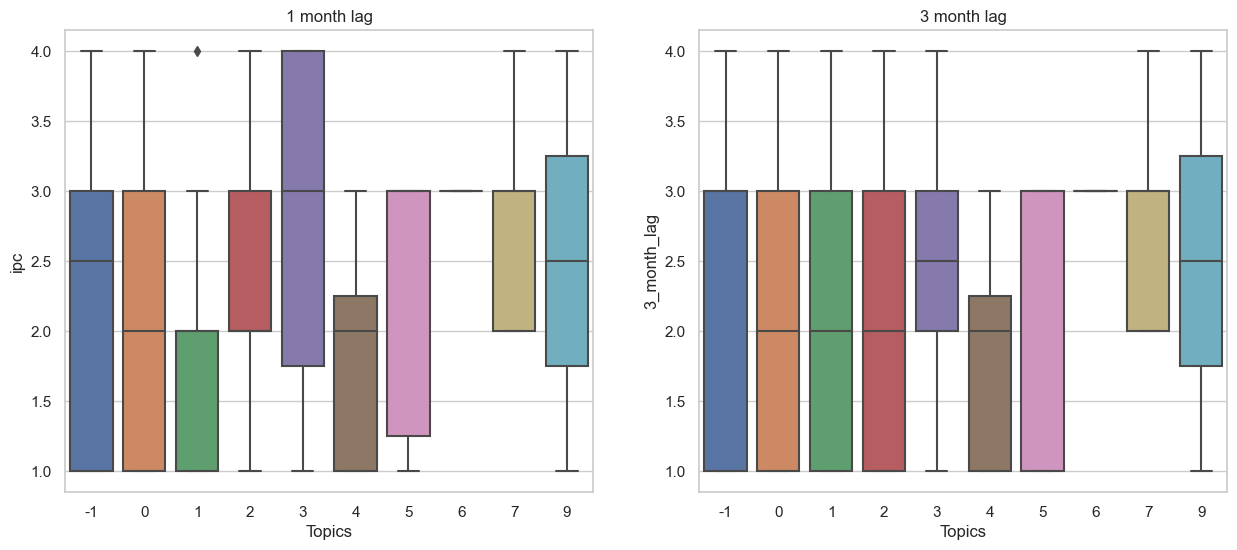

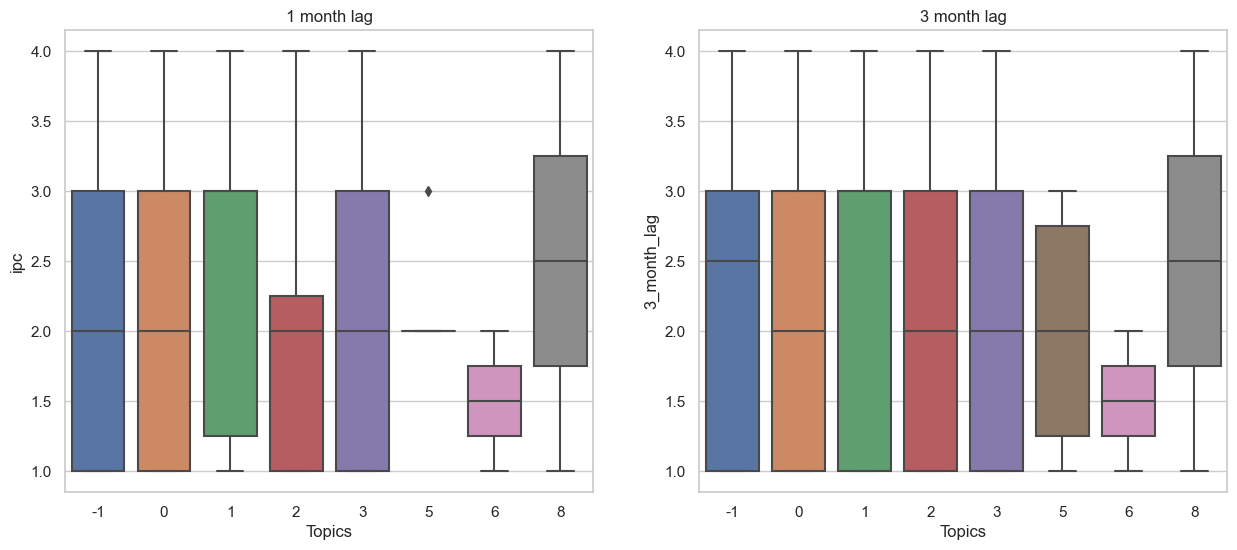

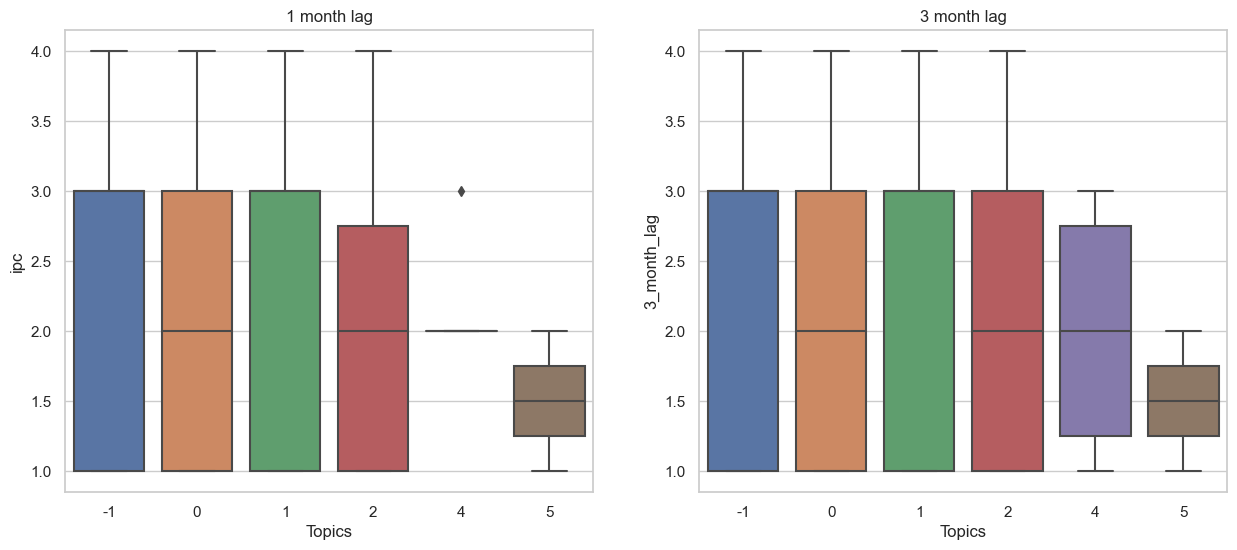

In [29]:
for one_lag, three_lag in [(stat_1_lag_group,stat_3_lag_group), (ten_1_lag_group,ten_3_lag_group), (seven_1_lag_group,seven_3_lag_group)]:
    # Explode the lists in 'lag' column
    exploded_1_lag = one_lag.explode('1_month_lag')
    exploded_3_lag = three_lag.explode('3_month_lag')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    # Set the style and create a box plot
    sns.set(style="whitegrid")
    sns.boxplot(data=exploded_1_lag, x=exploded_1_lag.columns[0], y=exploded_1_lag.columns[1], ax=ax1)
    sns.boxplot(data=exploded_3_lag, x=exploded_3_lag.columns[0], y=exploded_3_lag.columns[1], ax=ax2)

    # Add labels and title
    ax1.set_xlabel('Topics')
    ax1.set_ylabel('ipc')
    ax1.set_title('1 month lag')

    ax2.set_xlabel('Topics')
    ax2.set_title('3 month lag')

    plt.show()

In [38]:
# Perform one-way ANOVA
f_statistic_auto, p_value_auto = stats.f_oneway(stat_1_lag_group['1_month_lag'][0],stat_1_lag_group['1_month_lag'][1],stat_1_lag_group['1_month_lag'][2],stat_1_lag_group['1_month_lag'][3],stat_1_lag_group['1_month_lag'][4],stat_1_lag_group['1_month_lag'][5],stat_1_lag_group['1_month_lag'][6],stat_1_lag_group['1_month_lag'][7],stat_1_lag_group['1_month_lag'][8],stat_1_lag_group['1_month_lag'][9])
f_statistic_10, p_value_10 = stats.f_oneway(ten_1_lag_group['1_month_lag'][0],ten_1_lag_group['1_month_lag'][1],ten_1_lag_group['1_month_lag'][2],ten_1_lag_group['1_month_lag'][3],ten_1_lag_group['1_month_lag'][4],ten_1_lag_group['1_month_lag'][5],ten_1_lag_group['1_month_lag'][6],ten_1_lag_group['1_month_lag'][7])

print(f"One-way ANOVA F-stat auto: {f_statistic_auto}")
print(f"P-value auto: {p_value_auto}")
print(f"One-way ANOVA F-stat 10: {f_statistic_10}")
print(f"P-value 10: {p_value_10}")

One-way ANOVA F-stat auto: 3.6892919121743364
P-value auto: 0.00018111874556012953
One-way ANOVA F-stat 10: 3.5529015165932587
P-value 10: 0.0010018489782834517


In [31]:
# Flatten the data and assign group labels
flattened_data = [val for sublist in stat_1_lag_group['1_month_lag'] for val in sublist]
group_labels = [label for label, data_list in zip(stat_1_lag_group['topics_stat'], stat_1_lag_group['1_month_lag']) for _ in data_list]

# Perform Tukey's HSD post hoc test
posthoc = pairwise_tukeyhsd(flattened_data, group_labels)

# View the results
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -1      0  -0.4615 0.0002 -0.7811 -0.1418   True
    -1      1  -0.4102 0.7533  -1.147  0.3266  False
    -1      2  -0.0022    1.0 -0.5661  0.5617  False
    -1      3   0.4574 0.9313 -0.5927  1.5076  False
    -1      4  -0.3926 0.7192 -1.0768  0.2917  False
    -1      5  -0.0148    1.0 -0.7325   0.703  False
    -1      6   0.7074 0.9989 -2.2093  3.6242  False
    -1      7   0.5074 0.9682 -0.8107  1.8256  False
    -1      9   0.2074    1.0 -1.8605  2.2754  False
     0      1   0.0513    1.0 -0.6937  0.7962  False
     0      2   0.4592 0.2493 -0.1154  1.0338  False
     0      3   0.9189  0.151  -0.137  1.9748  False
     0      4   0.0689    1.0 -0.6241   0.762  False
     0      5   0.4467 0.6301 -0.2795  1.1729  False
     0      6   1.1689  0.959 -1.7499  4.0878  False
     0      7   0.9689 0.3719 -0.3538  2.2917 

In [32]:
# Convert the TukeyHSDResults to a DataFrame
df_posthoc = pd.DataFrame(data=posthoc._results_table.data[1:], columns=posthoc._results_table.data[0])

# Filter rows where 'reject' is False
significant_comparisons = df_posthoc[df_posthoc['reject']==False]

significant_comparisons_sorted = significant_comparisons.sort_values(by='p-adj', ascending=False)

# Display the significant comparisons
print(significant_comparisons_sorted)

    group1  group2  meandiff   p-adj   lower   upper  reject
44       7       9   -0.3000  1.0000 -2.7339  2.1339   False
2       -1       2   -0.0022  1.0000 -0.5661  0.5617   False
26       2       5   -0.0125  1.0000 -0.8746  0.8495   False
29       2       9    0.2097  1.0000 -1.9126  2.3320   False
32       3       6    0.2500  1.0000 -2.8355  3.3355   False
33       3       7    0.0500  1.0000 -1.6084  1.7084   False
34       3       9   -0.2500  1.0000 -2.5498  2.0498   False
12       0       4    0.0689  1.0000 -0.6241  0.7620   False
19       1       4    0.0176  1.0000 -0.9420  0.9773   False
9        0       1    0.0513  1.0000 -0.6937  0.7962   False
8       -1       9    0.2074  1.0000 -1.8605  2.2754   False
41       5       9    0.2222  1.0000 -1.9460  2.3905   False
5       -1       5   -0.0148  1.0000 -0.7325  0.7030   False
42       6       7   -0.2000  1.0000 -3.3867  2.9867   False
43       6       9   -0.5000  1.0000 -4.0628  3.0628   False
27       2       6    0.

In [34]:
significant_comparisons_sorted_filter = significant_comparisons_sorted[(significant_comparisons_sorted['p-adj']>0.95) & (abs(significant_comparisons_sorted['meandiff']) < 0.1)]
significant_comparisons_sorted_filter

,group1,group2,meandiff,p-adj,lower,upper,reject
2,-1,2,-0.0022,1.0,-0.5661,0.5617,False
26,2,5,-0.0125,1.0,-0.8746,0.8495,False
33,3,7,0.0500,1.0,-1.6084,1.7084,False
12,0,4,0.0689,1.0,-0.6241,0.7620,False
19,1,4,0.0176,1.0,-0.9420,0.9773,False
9,0,1,0.0513,1.0,-0.6937,0.7962,False
5,-1,5,-0.0148,1.0,-0.7325,0.7030,False


C:\Users\20210967\AppData\Local\Temp\ipykernel_17044\1113689566.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


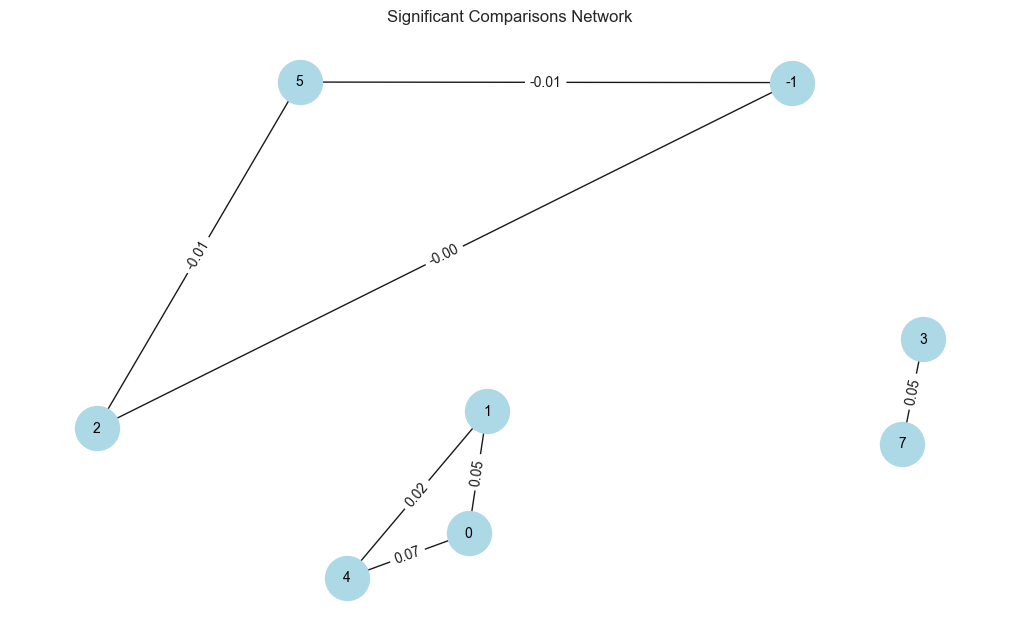

In [36]:
# Create a network graph
G = nx.Graph()

# Add nodes (groups) to the graph
for group in significant_comparisons_sorted_filter['group1']:
    G.add_node(group)

# Add edges (significant comparisons) to the graph
for index, row in significant_comparisons_sorted_filter.iterrows():
    G.add_edge(row['group1'], row['group2'], weight=row['meandiff'])

# Set positions for the nodes (you can customize this)
pos = nx.spring_layout(G)

# Create a network plot
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')

# Add edge labels (mean differences)
edge_labels = {(edge[0], edge[1]): f"{weight:.2f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Customize the plot
plt.title('Significant Comparisons Network')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()